## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import analysis

## Importing the data

In [2]:
df = pd.read_csv("Files/data.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88800 entries, 0 to 88799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           88800 non-null  object 
 1   Titles        88800 non-null  object 
 2   Price         87553 non-null  float64
 3   Location      88800 non-null  object 
 4   Rooms         88800 non-null  int64  
 5   Areas         88800 non-null  float64
 6   Bathrooms     88800 non-null  int64  
 7   Listing Type  61076 non-null  object 
 8   Neighborhood  88800 non-null  object 
 9   City          88373 non-null  object 
 10  State         58610 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.1+ MB


## Data cleaning & adding features

**Data cleaning**

In [3]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=["URL", "Titles", "Location"])

# Drop rows with missing values in the "Price" column
df.dropna(subset=["Price"], inplace=True)

# Drop rows with prices over 800,000 and less than 10000
df = df[(df['Price'] <= 800000) & (df['Price'] >= 10000)]

# Drop rows with areas over 400 and less than 5
df = df[(df['Areas'] <= 400) & (df['Areas'] >= 5)]

# Display the DataFrame info after dropping the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81350 entries, 1 to 88799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         81350 non-null  float64
 1   Rooms         81350 non-null  int64  
 2   Areas         81350 non-null  float64
 3   Bathrooms     81350 non-null  int64  
 4   Listing Type  55616 non-null  object 
 5   Neighborhood  81350 non-null  object 
 6   City          80943 non-null  object 
 7   State         55071 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.6+ MB


**Adding features**

In [4]:
# Create the Price per square meter feature
df['Price_per_Square_Meter'] = (df['Price'] / df['Areas']).round(2)

# Create the Square meter per room feature
df['Square_Meter_per_Room'] = ((df['Areas'] / df['Rooms']).replace([np.inf, -np.inf], np.nan)).round(2)

# Create the Square meter per bathroom feature
df['Square_Meter_per_Bathroom'] = ((df['Areas'] / df['Bathrooms']).replace([np.inf, -np.inf], np.nan)).round(2)

# Replace NaN values with 0 in the 'Square_Meter_per_Room' and 'Square_Meter_per_Bathroom' columns
df['Square_Meter_per_Room'].fillna(0, inplace=True)
df['Square_Meter_per_Bathroom'].fillna(0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81350 entries, 1 to 88799
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      81350 non-null  float64
 1   Rooms                      81350 non-null  int64  
 2   Areas                      81350 non-null  float64
 3   Bathrooms                  81350 non-null  int64  
 4   Listing Type               55616 non-null  object 
 5   Neighborhood               81350 non-null  object 
 6   City                       80943 non-null  object 
 7   State                      55071 non-null  object 
 8   Price_per_Square_Meter     81350 non-null  float64
 9   Square_Meter_per_Room      81350 non-null  float64
 10  Square_Meter_per_Bathroom  81350 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 7.4+ MB


## Hot-enconde and dummies

In [6]:
from sklearn.preprocessing import LabelEncoder

# Fill missing Listing Type with 'Usado' (used)
df['Listing Type'].fillna('Usado', inplace=True)

# Perform one-hot encoding using get_dummies
df = pd.get_dummies(df, columns=['Listing Type'])

# Calculate target means for Neighborhood, City, and State
neighborhood_means = df.groupby('Neighborhood')['Price'].mean()
city_means = df.groupby('City')['Price'].mean()
state_means = df.groupby('State')['Price'].mean()

# Map the means to the respective columns
df['Neighborhood_Encoded'] = df['Neighborhood'].map(neighborhood_means).round(2)
df['City_Encoded'] = df['City'].map(city_means).round(2)
df['State_Encoded'] = df['State'].map(state_means).round(2)

# Drop the original columns
df.drop(columns=['Neighborhood', 'City', 'State'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81350 entries, 1 to 88799
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        81350 non-null  float64
 1   Rooms                        81350 non-null  int64  
 2   Areas                        81350 non-null  float64
 3   Bathrooms                    81350 non-null  int64  
 4   Price_per_Square_Meter       81350 non-null  float64
 5   Square_Meter_per_Room        81350 non-null  float64
 6   Square_Meter_per_Bathroom    81350 non-null  float64
 7   Listing Type_Em construção   81350 non-null  bool   
 8   Listing Type_Novo            81350 non-null  bool   
 9   Listing Type_Para recuperar  81350 non-null  bool   
 10  Listing Type_Ruína           81350 non-null  bool   
 11  Listing Type_Usado           81350 non-null  bool   
 12  Neighborhood_Encoded         81350 non-null  float64
 13  City_Encoded         

In [7]:
df.head(5)

,Price,Rooms,Areas,Bathrooms,Price_per_Square_Meter,Square_Meter_per_Room,Square_Meter_per_Bathroom,Listing Type_Em construção,Listing Type_Novo,Listing Type_Para recuperar,Listing Type_Ruína,Listing Type_Usado,Neighborhood_Encoded,City_Encoded,State_Encoded
1,365000.0,2,48.0,2,7604.17,24.00,24.0,False,False,False,False,True,537515.90,445070.89,NaN
2,299900.0,1,51.0,1,5880.39,51.00,51.0,False,False,False,False,True,344659.19,445070.89,NaN
3,550000.0,1,84.0,2,6547.62,84.00,42.0,False,False,False,False,True,343139.37,445070.89,NaN
4,725000.0,3,114.0,2,6359.65,38.00,57.0,False,False,False,False,True,472983.19,445070.89,NaN
5,300000.0,3,98.0,2,3061.22,32.67,49.0,False,False,False,False,True,406088.67,466002.38,307418.37


In [8]:
df.describe()

,Price,Rooms,Areas,Bathrooms,Price_per_Square_Meter,Square_Meter_per_Room,Square_Meter_per_Bathroom,Neighborhood_Encoded,City_Encoded,State_Encoded
count,81350.000000,81350.000000,81350.000000,81350.000000,81350.000000,81350.000000,81350.000000,81350.000000,80943.000000,55071.000000
mean,315448.252932,2.261930,101.037516,1.677357,3378.611770,44.112587,52.560266,315448.253024,315842.812253,298953.846133
std,156434.216393,0.969883,40.877139,0.909429,1747.452319,16.869128,25.727120,100132.917686,86608.944048,48225.371988
min,10000.000000,0.000000,5.000000,0.000000,109.760000,0.000000,0.000000,17600.000000,23000.000000,98532.130000
25%,195000.000000,2.000000,72.000000,1.000000,2205.880000,35.800000,41.050000,234044.130000,239283.240000,273228.830000
50%,278000.000000,2.000000,96.000000,2.000000,2993.770000,43.000000,51.670000,302641.450000,331113.490000,307418.370000
75%,399900.000000,3.000000,124.000000,2.000000,4128.577500,51.500000,65.090000,392713.330000,366452.560000,318629.790000
max,800000.000000,10.000000,400.000000,4.000000,56000.000000,256.000000,360.000000,750000.000000,545000.000000,408123.850000


## Train & test Split

In [9]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.drop(columns=['Price', 'City_Encoded', 'State_Encoded', 'Neighborhood_Encoded', 'Areas', 'Rooms'])  
y = df['Price']  # Assuming 'Price' is your target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (56945, 9)
X_test shape: (24405, 9)
y_train shape: (56945,)
y_test shape: (24405,)


## Standarlazing the features

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = lm.predict(X_test_scaled)


In [12]:


# Call the analyze_precision function
analysis.evaluate_model_performance(y_test, predictions)

{'MAE': 76567.49110398183,
 'MSE': 10782517267.44354,
 'RMSE': 103838.90055005177,
 'R2': 0.5669084288192707}

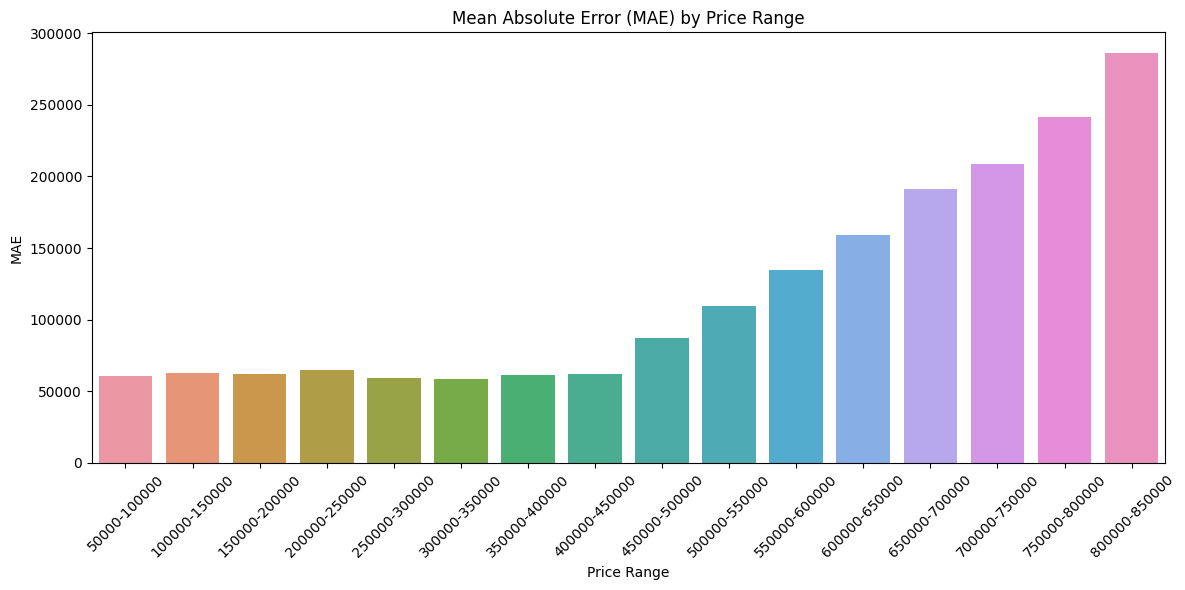

c:\Users\willi\Documents\Jupyter\Predict apartment price Project\Main\analysis.py:72: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Values', color='blue', shade=True)
c:\Users\willi\Documents\Jupyter\Predict apartment price Project\Main\analysis.py:73: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions, label='Predicted Values', color='red', shade=True)


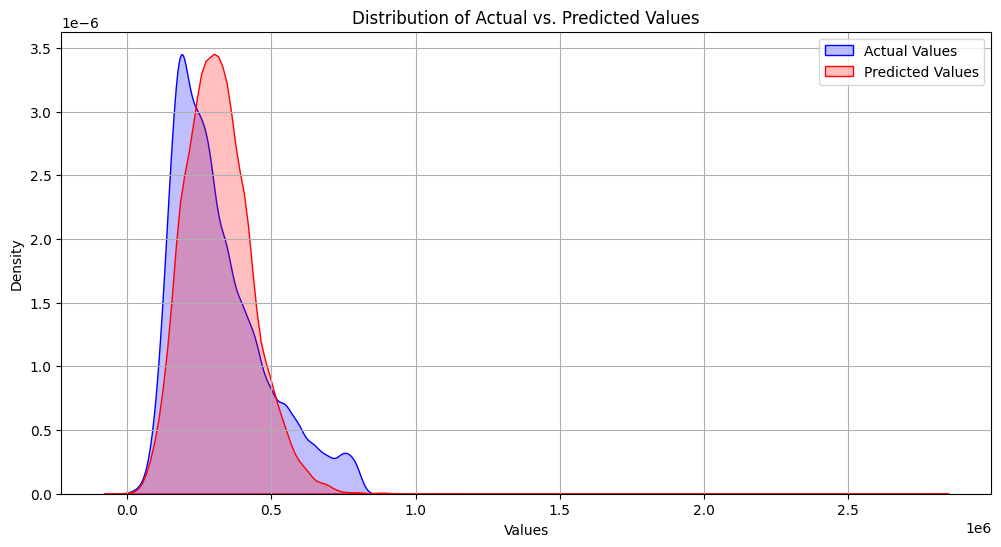

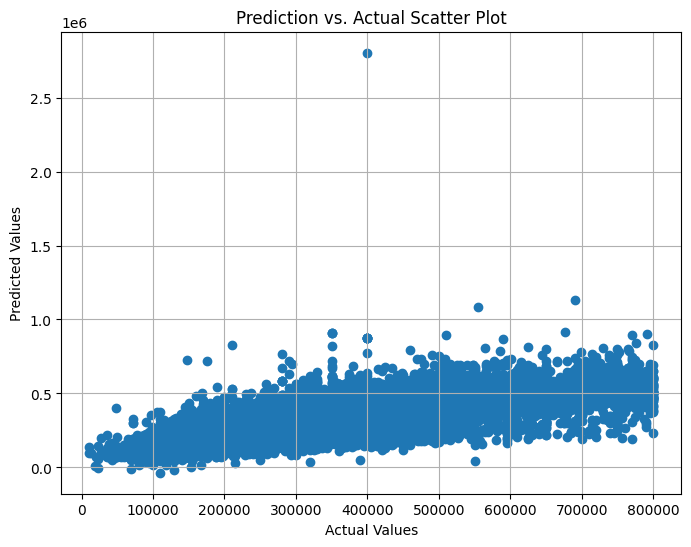

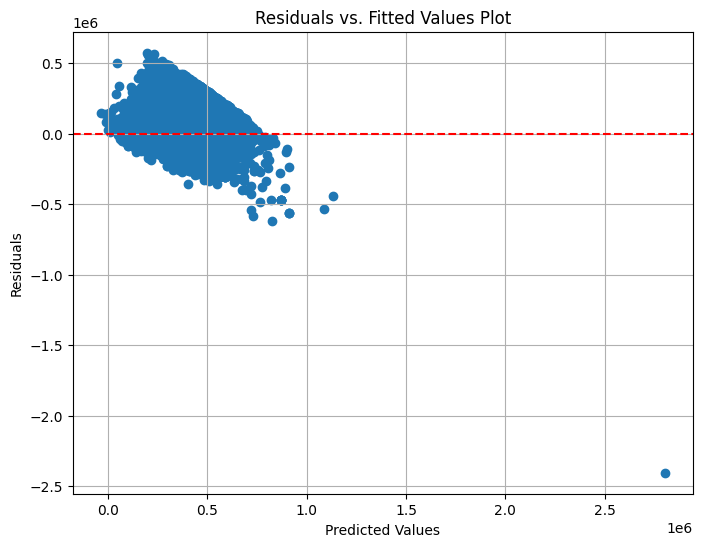

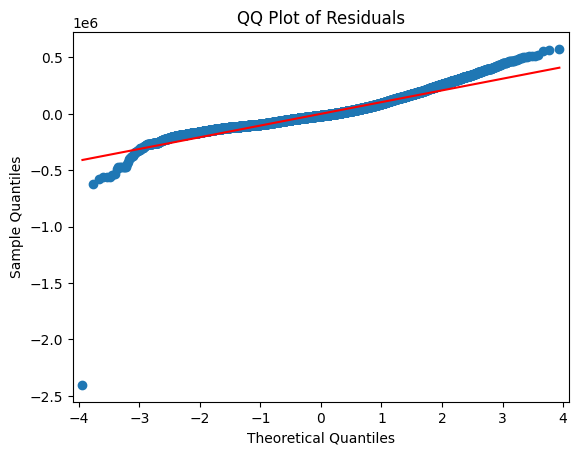

In [13]:
# Call the modified analyze_precision function
analysis.analyze_precision(X_test, y_test, predictions)